## Data Manipulation and python syntax

In [4]:
import pandas as pd
import numpy as np
from scipy import stats
from utils import setup_project_root

setup_project_root()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0
...,...,...,...,...,...,...,...,...,...,...,...
10655,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107.0
10656,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145.0
10657,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,NaN,11:20,3h,non-stop,NaN,7229.0
10658,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648.0


In [5]:
planes = pd.read_csv(r"data/planes.csv")
planes

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0
...,...,...,...,...,...,...,...,...,...,...,...
10655,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107.0
10656,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145.0
10657,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,NaN,11:20,3h,non-stop,NaN,7229.0
10658,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648.0


## Looking at d-types

In [2]:
planes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10660 entries, 0 to 10659
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10233 non-null  object 
 1   Date_of_Journey  10338 non-null  object 
 2   Source           10473 non-null  object 
 3   Destination      10313 non-null  object 
 4   Route            10404 non-null  object 
 5   Dep_Time         10400 non-null  object 
 6   Arrival_Time     10466 non-null  object 
 7   Duration         10446 non-null  object 
 8   Total_Stops      10448 non-null  object 
 9   Additional_Info  10071 non-null  object 
 10  Price            10044 non-null  float64
dtypes: float64(1), object(10)
memory usage: 916.2+ KB


In [3]:
## Converting into dates
planes['Date_of_Journey'] = pd.to_datetime(planes['Date_of_Journey'], format='%d/%m/%Y')
planes['Day of Week'] = planes['Date_of_Journey'].dt.day_name()

planes[['Date_of_Journey', 'Day of Week']]

def weekend(day):
    if day in ['Sunday', 'Saturday']:
        return True
    else:
        return False

planes['Weekend'] = planes['Day of Week'].transform(weekend)
planes[['Date_of_Journey', 'Day of Week', 'Weekend']]

beginning_week_flights = planes[planes['Day of Week'].isin(['Monday', 'Tuesday', 'Wednesday'])]

In [4]:
round(beginning_week_flights['Day of Week'].value_counts(normalize=True), 2)*100

Day of Week
Wednesday    43.0
Monday       39.0
Tuesday      18.0
Name: proportion, dtype: float64

## Regular Expressions

- \d: digit character
- \w: word char
- \s: space cnhar
- \D: non-digit
- \S
- \W

- Ranges:
    [0-9]
    [A-Za-z]

- Flags/Modifiers
    '+' one or more of the preceding char
    '?' zero or one of preceding
    '*' zero or more

In [5]:
planes['Duration'].sample(frac=0.1)
import re
def extract_duration(duration):
    if pd.isna(duration):
        return None
    hours_regex = r'(\d+)h'
    mins_regex = r'(\d+)m'

    hours = re.findall(hours_regex, duration)
    mins = re.findall(mins_regex, duration)

    if hours:
        hours = int(hours[0])
    else:
        hours=0
    if mins:
        mins = round(int(mins[0])/60,2)
    else:
        mins=0
    
    return hours + mins
list(map(extract_duration, planes['Duration']))
planes['Duration'] = planes['Duration'].transform(extract_duration)

In [6]:
planes['Duration'].corr(planes['Price'])

np.float64(0.5245640645432746)

<Axes: xlabel='Duration', ylabel='Count'>

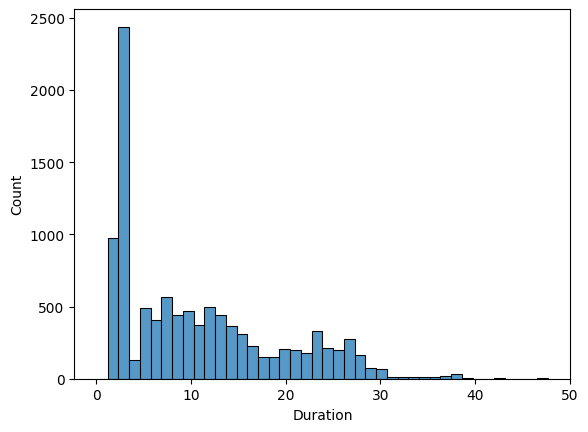

In [7]:
import seaborn as sns
sns.histplot(planes['Duration'])

In [8]:
import numpy as np
duration_bins = [-np.inf, 4, 9, np.inf]
duration_labels = ['Short', 'Mid', 'Long']
planes['Haul'] = pd.cut(x=planes['Duration'], bins=duration_bins, labels=duration_labels)

planes[['Duration', 'Haul']]

,Duration,Haul
0,19.00,Long
1,5.42,Mid
2,4.75,Mid
3,2.42,Short
4,15.50,Long
...,...,...
10655,2.50,Short
10656,2.58,Short
10657,3.00,Short
10658,2.67,Short


In [9]:
planes.groupby(['Haul'])['Price'].mean()

C:\Users\Xps\AppData\Local\Temp\ipykernel_19360\345681650.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  planes.groupby(['Haul'])['Price'].mean()


Haul
Short     5028.750994
Mid      10027.034934
Long     11426.398146
Name: Price, dtype: float64

## Create a cut of the price column 
## Group the dataset by the airlines and see if the interesting price differences
## Convert the total stops column to numerical

<Axes: xlabel='Price', ylabel='Count'>

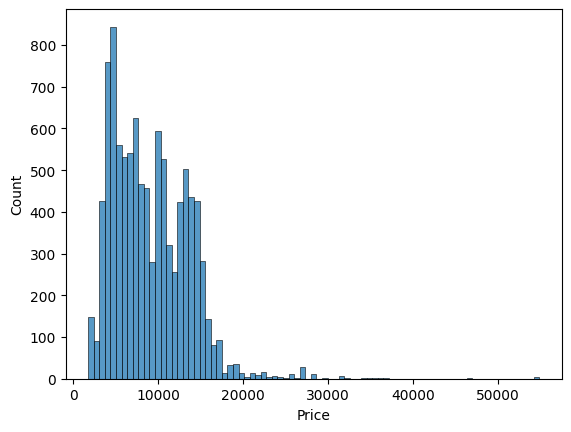

In [10]:
sns.histplot(planes['Price'])

<Axes: xlabel='Price'>

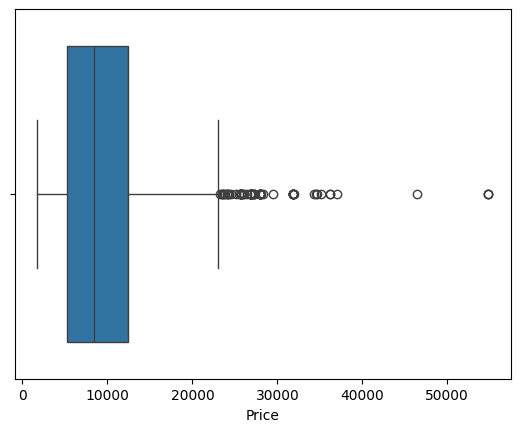

In [11]:
sns.boxplot(x=planes['Price'])

## Z-Scores

- x - mu / sigma

<Axes: xlabel='Price_Z', ylabel='Count'>

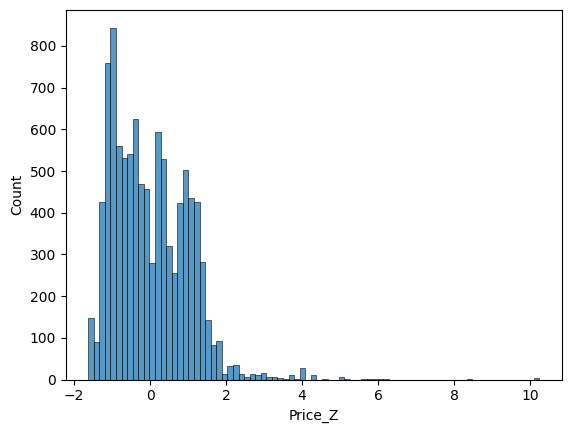

In [12]:
def z_scoring(x, mu, sigma):
    return (x -mu) / sigma
planes['Price_Z'] = [z_scoring(x=x, mu=planes['Price'].mean(), sigma=planes['Price'].std()) 
for x in planes['Price']]

sns.histplot(planes['Price_Z'])


In [13]:
price_bins = [-np.inf, -1, 1.5, 2.5, np.inf]
price_labels = ['Cheap', 'Average', 'Expensive', 'Very Expensive']
planes['Price Band'] = pd.cut(x=planes['Price_Z'], bins= price_bins, labels = price_labels)

round(planes['Price Band'].value_counts(normalize=True),2)*100

Price Band
Average           79.0
Cheap             16.0
Expensive          4.0
Very Expensive     1.0
Name: proportion, dtype: float64

In [14]:
pd.crosstab(index=planes['Airline'], columns=planes['Price Band'])

Price Band,Cheap,Average,Expensive,Very Expensive
Airline,,,,
Air Asia,136,159,0,0
Air India,126,1419,36,21
GoAir,63,110,2,1
IndiGo,567,1294,4,0
Jet Airways,142,3029,230,86
Multiple carriers,0,993,67,13
SpiceJet,548,202,0,1
Vistara,18,410,3,2


<Axes: xlabel='count', ylabel='Airline'>

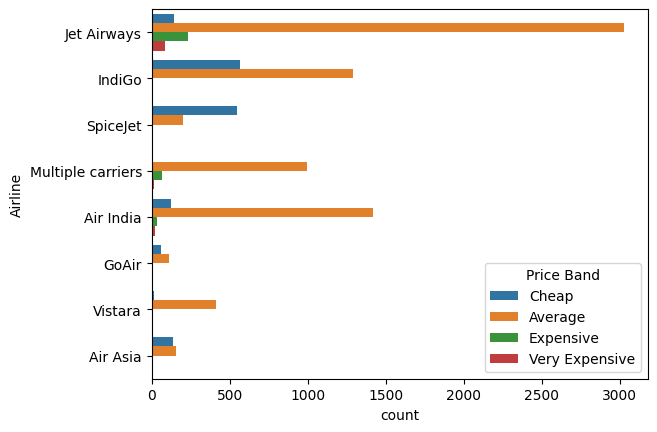

In [15]:
sns.countplot(data=planes, y='Airline', hue='Price Band')

In [16]:
## Correlation
planes.drop('Price_Z', axis=1).select_dtypes(include='number').corr()

,Duration,Price
Duration,1.000000,0.524564
Price,0.524564,1.000000


In [17]:
planes.loc[(planes['Airline']=='GoAir')&(planes['Price'].isnull())]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day of Week,Weekend,Haul,Price_Z,Price Band
1382,GoAir,2019-04-03,Delhi,Cochin,DEL → AMD → COK,07:25,13:35,6.17,1 stop,No info,NaN,Wednesday,False,Mid,NaN,NaN
4349,GoAir,2019-05-01,Banglore,NaN,BLR → DEL,07:45,10:40,2.92,non-stop,No info,NaN,Wednesday,False,Short,NaN,NaN
5903,GoAir,2019-05-09,Kolkata,Banglore,CCU → BOM → BLR,23:30,07:45 10 May,8.25,1 stop,No info,NaN,Thursday,False,Mid,NaN,NaN
6573,GoAir,2019-04-15,Delhi,Cochin,DEL → BOM → COK,07:00,12:55,5.92,NaN,No info,NaN,Monday,False,Mid,NaN,NaN
7365,GoAir,2019-05-06,Kolkata,Banglore,CCU → BOM → BLR,23:30,07:45 07 May,8.25,1 stop,No info,NaN,Monday,False,Mid,NaN,NaN
9779,GoAir,2019-06-27,Delhi,Cochin,NaN,14:25,NaN,5.17,1 stop,No info,NaN,Thursday,False,Mid,NaN,NaN


In [18]:
def range_(column):
    column = sorted(column[column.notnull()].to_numpy())
    return column[-1] - column[0]
planes.groupby(['Airline'])['Price'].agg(['mean', 'std', 'median',range_])

,mean,std,median,range_
Airline,,,,
Air Asia,5629.657627,2016.738954,5192.0,10091.0
Air India,9593.015605,3865.871975,9443.0,29895.0
GoAir,5914.477273,2790.815129,5135.0,19396.0
IndiGo,5684.994638,2266.753552,5013.0,17458.0
Jet Airways,11605.228850,4230.748840,11467.0,52986.0
Multiple carriers,10867.189189,3763.674706,9871.0,31186.0
SpiceJet,4290.035952,1790.851944,3873.0,21508.0
Vistara,7831.260970,2864.267802,8028.0,18043.0


![Normal dist.png](<attachment:Normal dist.png>)
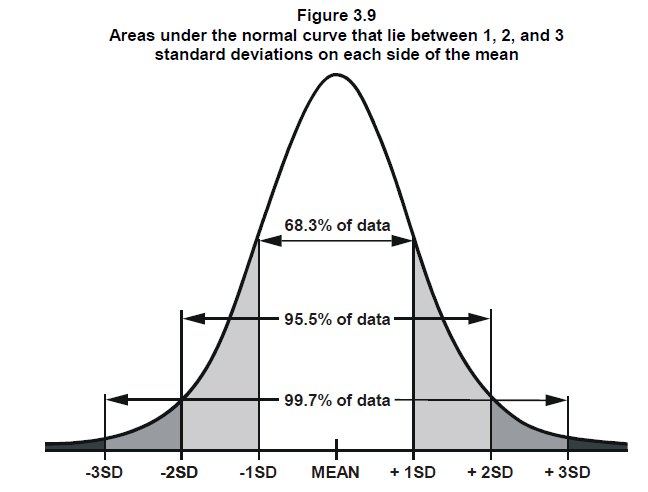

## Deep Dive into LOC and ILOC

In [28]:
planes[(planes['Airline'] == 'Jet Airways') & (planes['Price'] > 10000)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day of Week,Weekend,Haul,Price_Z,Price Band
0,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19.00,2 stops,No info,13882.0,Sunday,True,Long,1.081677,Average
4,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15.50,1 stop,In-flight meal not included,11087.0,Tuesday,False,Long,0.456719,Average
5,Jet Airways,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21.08,1 stop,No info,22270.0,Friday,False,Long,2.957220,Very Expensive
6,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25.50,1 stop,In-flight meal not included,11087.0,Tuesday,False,Long,0.456719,Average
15,Jet Airways,2019-06-12,Delhi,Cochin,DEL → BOM → COK,14:00,12:35 13 Jun,22.58,1 stop,In-flight meal not included,10262.0,Wednesday,False,Long,0.272251,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10644,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,22:55,20:20 13 Mar,21.42,1 stop,In-flight meal not included,11087.0,Tuesday,False,Long,0.456719,Average
10645,Jet Airways,2019-05-09,Delhi,Cochin,DEL → JDH → BOM → COK,11:40,19:00,7.33,2 stops,No info,21219.0,Thursday,False,Mid,2.722218,Very Expensive
10649,Jet Airways,2019-06-27,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19.92,2 stops,In-flight meal not included,11150.0,Thursday,False,Long,0.470806,Average
10650,Jet Airways,2019-05-27,Delhi,Cochin,DEL → AMD → BOM → COK,13:25,04:25 28 May,15.00,2 stops,No info,16704.0,Monday,False,Long,1.712671,Expensive


In [34]:
planes.loc[(planes['Airline'] == 'Jet Airways') & (planes['Price'] > 10000), ['Source']].to_numpy()

array([['Delhi'],
       ['Banglore'],
       ['Banglore'],
       ...,
       ['Delhi'],
       ['Delhi'],
       ['Banglore']], shape=(2433, 1), dtype=object)

In [60]:
planes.shape[0]

10660

In [81]:
planes['Additional_Info'].value_counts()

Additional_Info
No info                         7867
In-flight meal not included     1874
No check-in baggage included     299
1 Long layover                    18
Change airports                    7
No Info                            2
1 Short layover                    1
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [ ]:
airline_info ={
    airline:planes.loc[planes['Airline'] == airline].reset_index() for airline in planes.loc[planes['Airline'].notnull(),'Airline'].unique()
}
global_75th = np.quantile(planes.loc[planes['Price'].notnull(), 'Price'],0.75 )
global_25th = np.quantile(planes.loc[planes['Price'].notnull(), 'Price'], 0.25)

global_iqr = global_75th - global_25th

gb_upper = global_75th + (global_iqr * 1.5)
gb_lower = global_25th - (global_iqr * 1.5)
for airline, data in airline_info.items():
    
    ## find irregular values compared to whole dataset
    global_anomalies = data.loc[(data['Price'] > gb_upper) | (data['Price']< gb_lower)].shape[0]
    if global_anomalies:
        print(f'{airline} has {global_anomalies} global anomalies')
    
    ## Find irregularity within the group
    within_75th = np.quantile(data.loc[data['Price'].notnull(), 'Price'],0.75 )
    within_25th = np.quantile(data.loc[data['Price'].notnull(), 'Price'], 0.25)

    within_iqr = within_75th - within_25th

    wh_upper = within_75th + (global_iqr * 1.5)
    wh_lower = within_25th - (global_iqr * 1.5)

    local_anomalies = data.loc[(data['Price'] > wh_upper) | (data['Price']< wh_lower)].shape[0]
    if local_anomalies:
        print(f'{airline} has {local_anomalies} local anomalies')
        print('-----------\n\n')



Jet Airways has 58 global anomalies
Jet Airways has 54 local anomalies
-----------


IndiGo has 2 local anomalies
-----------


SpiceJet has 1 global anomalies
SpiceJet has 1 local anomalies
-----------


Multiple carriers has 9 global anomalies
Multiple carriers has 7 local anomalies
-----------


Air India has 13 global anomalies
Air India has 13 local anomalies
-----------


GoAir has 3 local anomalies
-----------


Vistara has 2 local anomalies
-----------




<Axes: xlabel='count', ylabel='Airline'>

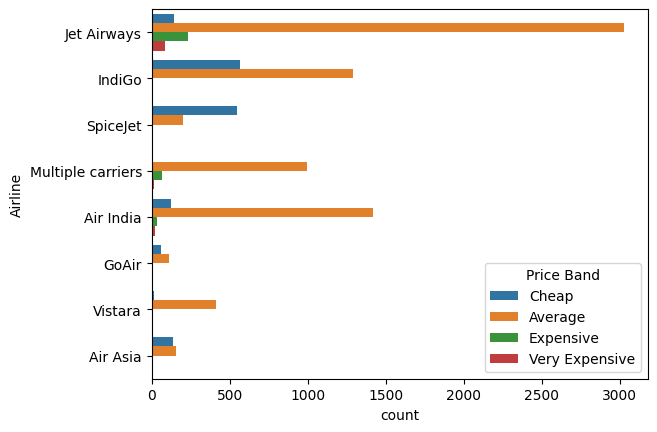

In [82]:
sns.countplot(data=planes, y='Airline', hue='Price Band')

## Use the Haul data/duration and find anomalies for each airline
## Bonus - for each source -> Destination (look into anomalies for price and duration)